## 스타벅스, 이디야 위치 분석하기

* 이디야는 스타벅스 근처에 입점한다는 설이 있습니다. 과연 이디야와 스타벅스의 매장입지는 얼마나 차이가 날까요? 관련 기사를 읽고 구별로 이디야와 스타벅스의 매장을 기사와 유사하게 분석하고 시각화 해보면서 Python, Pandas, Numpy, Seaborn, Matplotlib, folium 을 통해 다양한 방법으로 표현해 봅니다..

### 다루는 내용
* 공공데이터를 활용해 텍스트 데이터 정제하고 원하는 정보 찾아내기
* 문자열에서 원하는 텍스트 추출하기
* 문자열을 활용한 다양한 분석 방법과 위치 정보 사용하기
* folium을 통한 위경도 데이터 시각화 이해하기

### 데이터셋
* https://www.data.go.kr/dataset/15012005/fileData.do
* 구별로 매장수를 표현하기 위해 GeoJSON 파일 로드
    * 파일출처 : [southkorea/seoul-maps: Seoul administrative divisions in ESRI Shapefile, GeoJSON and TopoJSON formats.](https://github.com/southkorea/seoul-maps)
    * 이 링크에서도 다운로드가 가능합니다. https://drive.google.com/open?id=13j8-_XLdPe0pptsqu8-uyE-0Ym6V2jw5

In [2]:
# 데이터 분석을 위해 pandas를, 수치계산을 위해 numpy를, 시각화를 위해 seaborn을 불러옵니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
from matplotlib import font_manager,rc,rcParams,style

# 한글 폰트
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
plt.rcParams['axes.unicode_minus'] = False
rc('font',family=font)

In [4]:
# 파일을 불러와 df 라는 변수에 담습니다.
# shape 를 통해 불러온 csv 파일의 크기를 확인합니다.
df = pd.read_csv("./data/shopinfo.csv", sep='|',encoding='utf-8')
df.shape

(573680, 39)

In [5]:
df.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

<AxesSubplot:>

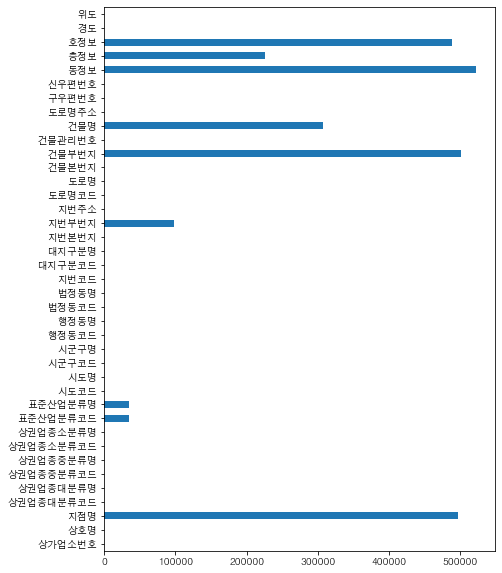

In [8]:
# 결측치 보기
df.isnull().sum().plot.barh(figsize=(7,10))

In [9]:
# 사용할 컬럼만 따로 모음

columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']

df = df[columns].copy()
df.shape

(573680, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   도로명주소     573680 non-null  object 
 9   경도        573680 non-null  float64
 10  위도        573680 non-null  float64
dtypes: float64(2), object(9)
memory usage: 48.1+ MB


In [11]:
# 시도명이 서울로 시작하는 데이터만 봅니다.
# 또, df_seoul 이라는 변수에 결과를 저장합니다.
# 새로운 변수에 데이터프레임을 할당할 때 copy()를 사용하는 것을 권장합니다.
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

(407376, 11)

In [12]:
# "상호명_소문자" 컬럼을 만듭니다.
df_seoul['상호명_소문자'] = df_seoul['상호명'].str.lower()

In [13]:
# ediya 를 "상호명_소문자" 컬럼으로 가져옵니다.
# '상호명_소문자'컬럼으로 '이디야|ediya' 를 가져와 갯수를 세어봅니다.
# loc[행]
# loc[행, 열]

df_seoul.loc[df_seoul['상호명_소문자'].str.contains('이디야|이디아|ediya'), '상호명_소문자'].shape

(543,)

In [14]:
# 상호명에서 스타벅스만 가져옵니다.
# 상호명은 소문자로 변경해 준 컬럼을 사용합니다.
# 스타벅스|starbucks 의 "상호명_소문자"로 갯수를 세어봅니다.

df_seoul.loc[df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks'), '상호명_소문자'].shape

(506,)

In [15]:
# '상호명_소문자'컬럼으로  '스타벅스|starbucks|이디야|이디아|ediya'를 가져와 df_cafe 변수에 담습니다.
df_cafe = df_seoul[
    df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks|이디야|이디아|ediya')].copy()
df_cafe.shape

(1049, 12)

In [16]:
# ~은 not을 의미합니다. 스타벅스가 아닌 데이터는 이디야로 넣어주어도 되지만
# 아래 코드처럼 결측치를 이디야로 채워줘도 괜찮습니다.
# df_cafe.loc[~df_cafe['상호명'].str.contains('스타벅스|starbucks'), '브랜드명'] = '이디야'

df_cafe.loc[df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'), "브랜드명"] = "스타벅스"
df_cafe.loc[~df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'), "브랜드명"] = "이디야"
df_cafe[["상호명_소문자", "브랜드명"]].head()

,상호명_소문자,브랜드명
1104,스타벅스,스타벅스
1675,이디야커피,이디야
2023,스타벅스종로3가점,스타벅스
2770,스타벅스,스타벅스
2957,이디야커피,이디야


In [17]:
df_cafe.브랜드명.isnull().sum()

0

In [18]:
df_cafe[["상호명_소문자", "브랜드명"]].tail()

,상호명_소문자,브랜드명
567090,스타벅스,스타벅스
567828,스타벅스,스타벅스
568636,이디야커피,이디야
570096,스타벅스,스타벅스
571052,스타벅스,스타벅스


## 시각화

In [21]:
# "상권업중분류명"을 countplot 으로 시각화하고 분류 혹은 데이터가 잘못 색인된 데이터가 있는지 봅니다.
df_cafe["상권업종중분류명"].value_counts()
# df_cafe["상권업종중분류명"].value_counts().plot.bar()

커피점/카페       1036
학원-어학           3
광고/인쇄           2
주유소/충전소         1
유흥주점            1
분양              1
주택수리            1
기타판매업           1
종합소매점           1
패스트푸드           1
운동/경기용품소매       1
Name: 상권업종중분류명, dtype: int64

In [22]:
df_cafe.to_csv('./data/shop_info_cafe.csv',encoding='utf-8')

In [23]:
df_cafe = df_cafe[df_cafe["상권업종중분류명"] == "커피점/카페"].copy()
df_cafe.shape

(1036, 13)

In [24]:
df_cafe["상권업종중분류명"].value_counts()

커피점/카페    1036
Name: 상권업종중분류명, dtype: int64

In [25]:
df_cafe["브랜드명"].value_counts()

이디야     532
스타벅스    504
Name: 브랜드명, dtype: int64

### 여기까지가 데이터 전처리

<AxesSubplot:xlabel='브랜드명', ylabel='count'>

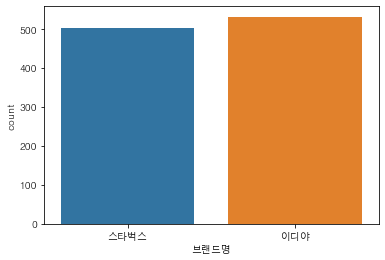

In [26]:
sns.countplot(data=df_cafe, x="브랜드명")

<AxesSubplot:xlabel='시군구명', ylabel='count'>

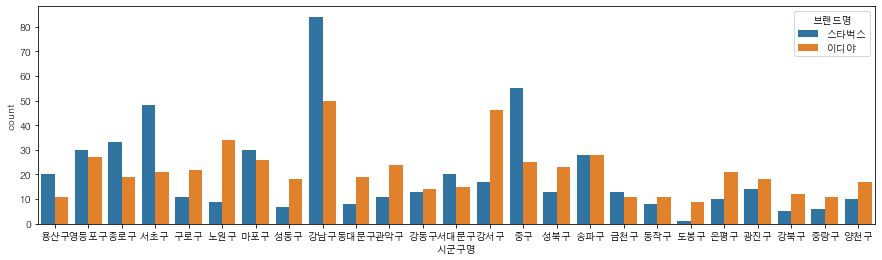

In [27]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df_cafe, x="시군구명", hue="브랜드명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

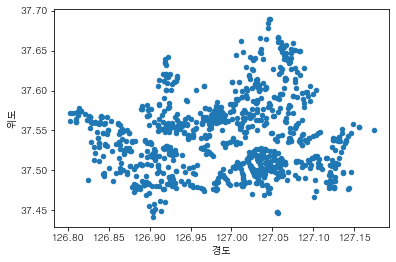

In [28]:
# pandas로 scatterplot을 그려봅니다.

df_cafe[["위도", "경도"]].plot.scatter(x="경도", y="위도")

<AxesSubplot:xlabel='경도', ylabel='위도'>

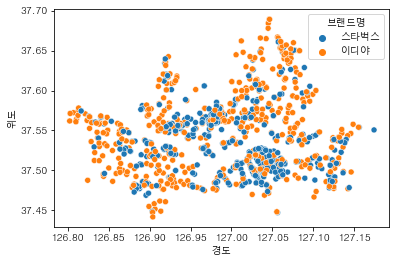

In [29]:
# seaborn의 scatterplot 으로 hue에 브랜드명을 지정해서 시각화 합니다.
sns.scatterplot(data=df_cafe, x="경도", y="위도", hue="브랜드명")

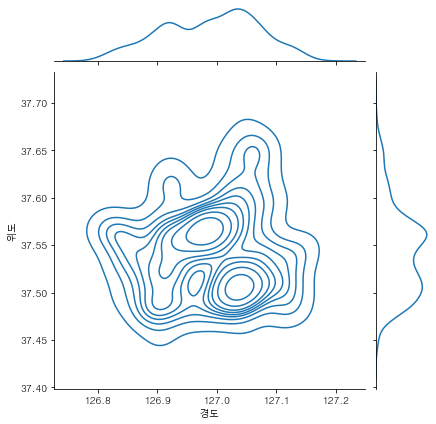

In [30]:
# jointplot 그리기
sns.jointplot(data=df_cafe, x="경도", y="위도", kind="kde")

In [31]:
# 구별로 브랜드별 점포수를 구합니다.
# groupby 를 사용하면 구별로 그룹화 해서 점포수를 구할 수 있습니다.
# 그룹화한 결과를 df_cafe_vs 변수에 담아서 재사용합니다.

df_cafe_vs = df_cafe.groupby(["시군구명", "브랜드명"])["상호명"].count()
df_cafe_vs.head()

시군구명  브랜드명
강남구   스타벅스    84
      이디야     50
강동구   스타벅스    13
      이디야     14
강북구   스타벅스     5
Name: 상호명, dtype: int64

In [32]:
df_cafe_vs = df_cafe_vs.reset_index()
df_cafe_vs.head()

,시군구명,브랜드명,상호명
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5


In [35]:
# groupby '시군구명', '브랜드명' 으로 갯수를 세어봅니다.
# 결과에 대한 데이터프레임 컬럼명을 ['구', '브랜드명', '매장수'] 로 지정합니다.

pivot = pd.pivot_table(data=df_cafe, 
               index=["시군구명", "브랜드명"], 
               values="상호명", aggfunc="count")
pivot.head()

상호명
시군구명 브랜드명     
강남구  스타벅스   84
     이디야    50
강동구  스타벅스   13
     이디야    14
강북구  스타벅스    5

In [36]:
pivot.loc["강남구"]

,상호명
브랜드명,
스타벅스,84
이디야,50


<AxesSubplot:xlabel='구', ylabel='매장수'>

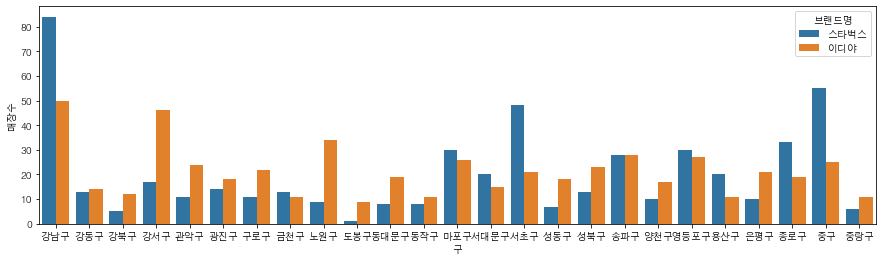

In [39]:
# seaborn의 barplot 을 활용해 구별 매장수를 시각화 합니다.
plt.figure(figsize=(15, 4))
sns.barplot(data=df_cafe_vs, x="구", y="매장수", hue="브랜드명")

<AxesSubplot:xlabel='구', ylabel='매장수'>

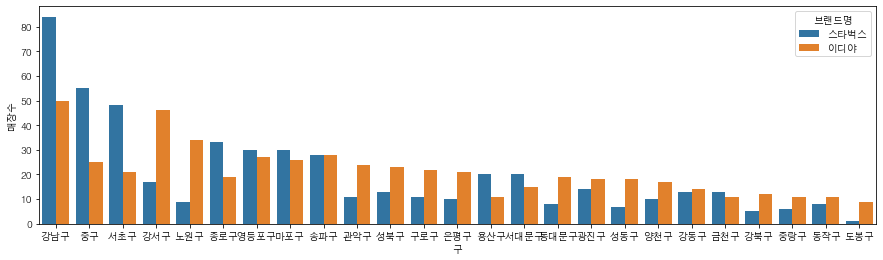

In [38]:
# seaborn의 barplot 을 활용해 구별 매장수를 시각화 합니다.
# barplot 정렬하기
plt.figure(figsize=(15, 4))
sns.barplot(data=df_cafe_vs.sort_values("매장수", ascending=False), x="구", y="매장수", hue="브랜드명")

### 지도 시각화

In [42]:
import folium

In [43]:
lat = df_cafe["위도"].mean()
long = df_cafe["경도"].mean()
lat, long

(37.542921398212634, 126.9887885123524)

In [50]:
map = folium.Map([lat,long],zoom_start=12,tiles='stamen toner')

for i in df_cafe.index:
    sub_lat = df_cafe.loc[i,'위도']
    sub_long = df_cafe.loc[i,'경도']

    title = f"{df_cafe.loc[i, '상호명']} - {df_cafe.loc[i, '도로명주소']}"

    color = 'green'
    if df_cafe.loc[i,'브랜드명']=='이디야':
        color = 'blue'

    folium.CircleMarker([sub_lat,sub_long],radius=2,color=color,tooltip=title).add_to(map)
map

In [51]:
geo_path = './data/seoul_municipalities_geo_simple.json'

import json

geo_json = json.load(open(geo_path, encoding="utf-8"))

In [52]:
geo_json["features"][0]['properties']["name"]

'강동구'

In [53]:
df_star = df_cafe_vs[df_cafe_vs["브랜드명"] == "스타벅스"].copy()
df_star.head()

,구,브랜드명,매장수
0,강남구,스타벅스,84
2,강동구,스타벅스,13
4,강북구,스타벅스,5
6,강서구,스타벅스,17
8,관악구,스타벅스,11


In [54]:
# df_cafe_starbucks 로 스타벅스 매장 수 구하기
# choropleth의 색상은 fill_color = 'YlGn'을 사용합니다.

m = folium.Map([lat, long])

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_star,
    columns=['구', '매장수'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='스타벅스 매장수'
).add_to(m)

m

In [55]:
# 이디야의 매장 수를 구합니다.
# "브랜드명"컬럼으로 이디야만 가져옵니다.
df_ediya = df_cafe_vs[df_cafe_vs["브랜드명"] == "이디야"].copy()
df_ediya.head()

,구,브랜드명,매장수
1,강남구,이디야,50
3,강동구,이디야,14
5,강북구,이디야,12
7,강서구,이디야,46
9,관악구,이디야,24


In [56]:
m = folium.Map([lat, long], tiles='stamen toner')

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_ediya,
    columns=['구', '매장수'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='이디야 매장수'
).add_to(m)


for i in df_cafe.index:
    sub_lat = df_cafe.loc[i, "위도"]
    sub_long = df_cafe.loc[i, "경도"]
    
    title = f"{df_cafe.loc[i, '상호명']} - {df_cafe.loc[i, '도로명주소']}"
    
    color = "green"
    if df_cafe.loc[i, "브랜드명"] == "이디야":
        color = "blue"
    
    folium.CircleMarker([sub_lat, sub_long],
                        radius=3,
                        color=color,
                          tooltip=title).add_to(m)

m

In [57]:
# df_vs 라는 변수에 구별 브랜드명을 pivot해서 스타벅스와 이디야 매장을 비교할 수 있는 형태로 만듭니다.
# 그리고 ["스타벅스", "이디야"] 로 컬럼명을 변경해주고 
# 스타벅스와 이디야의 매장을 비교한 값을 "매장수비교" 컬럼에 담아줍니다.
df_vs = df_cafe_vs.pivot(index="구", columns="브랜드명", values="매장수")
df_vs["매장수비교"] = df_vs["스타벅스"] - df_vs["이디야"] > 0
df_vs.head()

브랜드명,스타벅스,이디야,매장수비교
구,,,
강남구,84,50,True
강동구,13,14,False
강북구,5,12,False
강서구,17,46,False
관악구,11,24,False


In [58]:
# 간단한 함수를 사용해서 스타벅스가 이디야보다 매장수가 많을 때 1을 출력하도록 합니다.
df_vs["매장수비교"] = df_vs["매장수비교"].astype(float)
df_vs.head()

브랜드명,스타벅스,이디야,매장수비교
구,,,
강남구,84,50,1.0
강동구,13,14,0.0
강북구,5,12,0.0
강서구,17,46,0.0
관악구,11,24,0.0


In [59]:
# 구를 컬럼명으로 사용하기 위해 reset_index 를 합니다.
# 데이터 프레임을 df_vs 에 저장합니다.
df_vs = df_vs.reset_index()
df_vs.head()

브랜드명,구,스타벅스,이디야,매장수비교
0,강남구,84,50,1.0
1,강동구,13,14,0.0
2,강북구,5,12,0.0
3,강서구,17,46,0.0
4,관악구,11,24,0.0


In [60]:
# 스타벅스 매장 수 구하기
# choropleth의 색상은 fill_color = 'BuGn'을 사용합니다.
# CircleMarker의 radius 지정시 int 타입일 때 다음과 같은 타입오류가 나서 
# float type 으로 변경이 필요합니다.
# TypeError: Object of type 'int64' is not JSON serializable


m = folium.Map([lat, long], tiles='stamen toner')

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_vs,
    columns=['구', '매장수비교'],
    key_on='feature.properties.name',
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='매장수 비교'
).add_to(m)

m

In [61]:
df_gu_mean = df_cafe.pivot_table(index="시군구명", values=["경도", "위도"], aggfunc="mean")
df_gu_mean = df_gu_mean.reset_index()
df_gu_mean.head()

,시군구명,경도,위도
0,강남구,127.046129,37.505744
1,강동구,127.135417,37.540316
2,강북구,127.022897,37.631146
3,강서구,126.837883,37.555966
4,관악구,126.935210,37.482054


In [62]:
df_vs = df_vs.merge(df_gu_mean, how='inner', left_on="구", right_on="시군구명")
df_vs.head()

,구,스타벅스,이디야,매장수비교,시군구명,경도,위도
0,강남구,84,50,1.0,강남구,127.046129,37.505744
1,강동구,13,14,0.0,강동구,127.135417,37.540316
2,강북구,5,12,0.0,강북구,127.022897,37.631146
3,강서구,17,46,0.0,강서구,126.837883,37.555966
4,관악구,11,24,0.0,관악구,126.935210,37.482054


In [63]:
# 구별로 CircleMarker를 표현하기 위해서는 각 구의 위경도 값을 구해야 합니다.
# 구별 위도와 경도를 가져와 평균 값을 구해서 사용합니다.
# 특정 구의 위경도의 평균을 구합니다.

for i in df_vs.index:
    sub_long = df_vs.loc[i, "경도"]
    sub_lat = df_vs.loc[i, "위도"]
    
    print(df_vs.loc[i, "구"], sub_lat, sub_long)

강남구 37.50574379723648 127.04612924851483
강동구 37.540316128928005 127.13541705768309
강북구 37.63114579912596 127.02289728220342
강서구 37.555966339807725 126.83788319929005
관악구 37.482054429288624 126.93521011850085
광진구 37.543769718110475 127.08329747837425
구로구 37.49406074774298 126.87745596750014
금천구 37.46928692765211 126.89219622133886
노원구 37.64239330513539 127.06717137772726
도봉구 37.66576544822702 127.04047354226729
동대문구 37.580700635471146 127.0549281321253
동작구 37.49570035386574 126.94890217041826
마포구 37.55548154197543 126.92300493503947
서대문구 37.566284229288875 126.93762476470604
서초구 37.493010911046724 127.01402160112261
성동구 37.55457943854072 127.03635911128876
성북구 37.59886024576221 127.02565170180027
송파구 37.5011799146096 127.1141353230951
양천구 37.52891847594385 126.86196683493063
영등포구 37.520781009585264 126.91390000535674
용산구 37.53468952777027 126.98251254628539
은평구 37.61406806596294 126.92041650466945
종로구 37.57615434804085 126.98723628325016
중구 37.56289726978086 126.986573350736
중랑구 37.5960

In [64]:
m = folium.Map([lat, long], zoom_start=11, tiles='stamen toner')

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_vs,
    columns=['구', '매장수비교'],
    key_on='feature.properties.name',
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='매장수 비교'
).add_to(m)


for i in df_vs.index:
    sub_long = df_vs.loc[i, "경도"]
    sub_lat = df_vs.loc[i, "위도"]
    
    cafes = ["스타벅스", "이디야"]
    for cafe in cafes:
        cafe_count = df_vs.loc[i, cafe]
        
        gu = df_vs.loc[i, "구"]
        tooltip = f"{gu} {cafe} : {cafe_count}"
        
        radius = np.sqrt(cafe_count) * 3
        
        if cafe == "이디야":
            color = "blue"
            sub_long = sub_long + 0.01
        else:
            color = "green"
            
            
        folium.CircleMarker([sub_lat, sub_long],
                            radius=radius,
                            color=color,
                            fill=True,
                            tooltip=tooltip,
                           ).add_to(m)
        
m